# **Se recomienda ejecutar este notebook por Google Colab**

##**Integrantes:**

*   Benjamín López
*   Matías Egaña





In [ ]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# **Cálculo de métricas de desempeño en un sistema de colas MM1**

## Ingresar tasa de llegada (λ) y de atención (μ):

In [ ]:
lmbda = 9
mu = 12

## 1) Tiempo medio de clientes en la cola.

La fórmula para obtener el valor de dicho tiempo es:

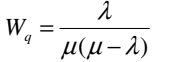

In [ ]:
def Wq(lmbda, mu):
  return lmbda / (mu * (mu - lmbda))

In [ ]:
Wq(lmbda, mu)

0.25

## 2) Tiempo medio de clientes en el sistema.

La fórmula para obtener el valor de dicho tiempo es:

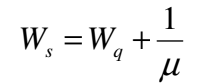

In [ ]:
def Ws(lmbda, mu):
  wq = Wq(lmbda, mu)
  ws = wq + (1 / mu)
  return ws

In [ ]:
Ws(lmbda, mu)

0.3333333333333333

## 3) Probabilidad de tener **n** clientes en el sistema.

La probabilidad se obtiene con la siguiente fórmula, considerando n >= 0:

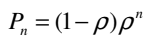

Versión a) Obtener sólo probabilidad de **n**.

In [ ]:
def Pn(n, lmbda, mu):
  _rho = lmbda / mu
  return (1 - (_rho)) * math.pow(_rho, n)

Ingrese valor para **n**.

In [ ]:
n = 0

In [ ]:
Pn(n, lmbda, mu)

0.25

Versión b) Obtener probabilidades hasta **n**.

In [ ]:
def Pn_range(n, lmbda, mu):
  # n+1 para incluir el último valor
  num_range = range(n+1)
  # Se crea una lista con tuplas que representan (n, probabilidad)
  pn_range = [(x, Pn(x, lmbda, mu)) for x in num_range]
  return pn_range

Para esta versión, el valor límite de **n**.

In [ ]:
n = 30

In [ ]:
pn_range = Pn_range(n, lmbda, mu)
pn_range

[(0, 0.25),
 (1, 0.1875),
 (2, 0.140625),
 (3, 0.10546875),
 (4, 0.0791015625),
 (5, 0.059326171875),
 (6, 0.04449462890625),
 (7, 0.0333709716796875),
 (8, 0.025028228759765625),
 (9, 0.01877117156982422),
 (10, 0.014078378677368164),
 (11, 0.010558784008026123),
 (12, 0.007919088006019592),
 (13, 0.005939316004514694),
 (14, 0.004454487003386021),
 (15, 0.0033408652525395155),
 (16, 0.0025056489394046366),
 (17, 0.0018792367045534775),
 (18, 0.001409427528415108),
 (19, 0.001057070646311331),
 (20, 0.0007928029847334983),
 (21, 0.0005946022385501237),
 (22, 0.0004459516789125928),
 (23, 0.0003344637591844446),
 (24, 0.00025084781938833345),
 (25, 0.00018813586454125009),
 (26, 0.00014110189840593756),
 (27, 0.00010582642380445317),
 (28, 7.936981785333988e-05),
 (29, 5.952736339000491e-05),
 (30, 4.464552254250368e-05)]

<Axes: xlabel='customers'>

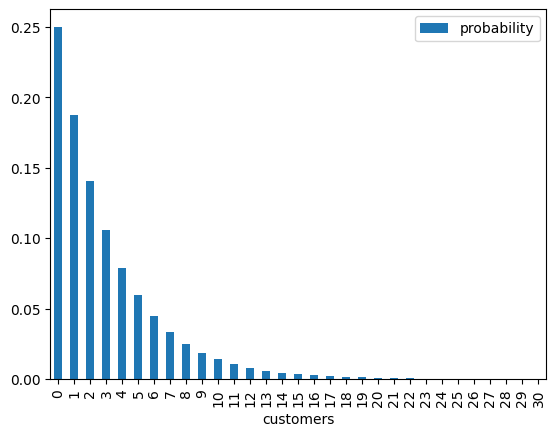

In [ ]:
df = pd.DataFrame(pn_range, columns=['customers', 'probability'])
df.plot(kind='bar', x='customers')

## 4) Factor de utilización

Este valor se obtiene mediante la siguiente fórmula:

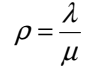

In [ ]:
def rho(lmbda, mu):
  return lmbda / mu

In [ ]:
rho(lmbda, mu)

0.75

## 5) Cantidad media de clientes en el sistema.

Esta métrica se obtiene aplicando la siguiente fórmula:

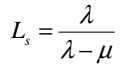

In [ ]:
def Ls(lmbda, mu):
  return lmbda * Ws(lmbda, mu)

In [ ]:
Ls(lmbda, mu)

3.0

## 6) Cantidad media de clientes en la cola.

Esta métrica se obtiene aplicando la siguiente fórmula:

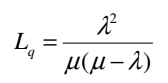

In [ ]:
def Lq(lmbda, mu):
  lmbda_squared = math.pow(lmbda, 2)
  return lmbda_squared / (mu * (mu - lmbda))

In [ ]:
Lq(lmbda, mu)

2.25

# **EJEMPLO**
## En un servicio de fotocopiado llegan 5 cliente cada hora y el operador de la fotocopiadora puede atenderlos a una tasa de 6 clientes cada hora.

### Determine
1.   Cantidad de clientes en el sistema.
2.   Tiempo total que esperan los clientes en el sistema.
3.   Cantidad de personas formadas en la fila.
4.   Tiempo en el cual los clientes esperan en fila.
5.   Porcentaje de uso del servidor.
6.   Porcentaje de tiempo en el cual el servidor está ocioso.
7.   Probabilidad de que se encuentren dos clientes en el sistema.



In [ ]:
lmbda = 5   # clientes por hora
mu = 6  # Clientes por hora

In [ ]:
# 1.
str(Ls(lmbda, mu)) + ' personas.'

'5.0 personas.'

In [ ]:
# 2.
str(Ws(lmbda, mu)) + ' hora/s.'

'1.0 hora/s.'

In [ ]:
# 3.
str(round(Lq(lmbda, mu), 4)) + ' personas en la cola.'

'4.1667 personas en la cola.'

In [ ]:
# 4.
_wq = Wq(lmbda, mu)
str(round(_wq , 4)) + ' hora/s.'

'0.8333 hora/s.'

In [ ]:
# 5.
_rho = rho(lmbda, mu)
str(round(_rho * 100, 4)) + '%'

'83.3333%'

In [ ]:
# 6.
_pn = Pn(0, lmbda, mu)
str(round(_pn * 100, 4)) + '%'

'16.6667%'

In [ ]:
# 7.
_pn = Pn(2, lmbda, mu)
str(round(_pn * 100, 4)) + '%'

'11.5741%'